**Panorama de la conectividad a Internet en Argentina: EDA**

Para mantener la narrativa fluida e interesante, organizaremos los datos en tres capítulos: Acceso, Calidad e Impacto.

# <span style="color:#E888BB; font-size: 1%;"> ### <b>I <span style='color:#526D82'>|</span> Preface</b></span>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/532173/pexels-photo-532173.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'> INTRODUCCION </span></b> </div>

### <b>I <span style='color:#526D82'>|</span> Prefacio</b>

 En este análisis, nos adentramos en el fascinante mundo del **<span style='color:#526D82'>Acceso a Internet en distintas latitudes (provincias) del pais, elegidas ademas segun sus ingresos per capita provincial </span>**. Nos centramos principalmente en analizar la tecnología disponible, la velocidad de bajada y la cobertura de distintos proveedores de internet en las distintas Provincias.

Nuestro conjunto de datos contiene una gran cantidad de información que abarca distintas regiones, proporcionando una vista de pájaro del acceso  Internet en diferentes partes del pais. Sin embargo, para apreciar realmente la granularidad y complejidad de estos datos, es imprescindible diseccionarlos en subconjuntos más específicos.

1. **Datos regionales**: El primer nivel de nuestro análisis ramifica los datos según la columna "Región", separando las regiones individuales de los datos colectivos. Esta segmentación proporciona una comprensión matizada de las diferencias regionales y los contrastes de desarrollo, y nos permite centrarnos en el panorama digital dentro de estos límites geográficos específicos. Al diseccionar los datos de esta manera, podemos desarrollar perspectivas específicas para cada región e identificar tendencias y patrones únicos.


2. **Datos del grupo de renta**: La segunda dimensión que exploramos es el grupo de renta. Esta categorización segrega a las provincias en varias categorias de renta, como provincias de renta baja, renta media-baja, renta media-alta y renta alta. Nos hubiera gustado realizar un análisis más detallado, examinando los datos según el ingreso promedio por localidad y no solo por provincia, ya que este último está muy promediado. Sin embargo, lamentablemente no se cuenta con información a nivel de localidades que nos permita hacer este tipo de segmentación más granular.
Analizar los datos a través del prisma de los grupos de renta nos permite evaluar si existe correlación entre la riqueza de la provincia y su acceso y uso de los servicios de Internet. Esta segmentación puede revelar notables disparidades en el uso de Internet, la accesibilidad y el desarrollo tecnológico en función del grupo de renta.

3. **Datos Poblacionales**: Por último, usamos los datos de la población de cada localidad . Esta instantánea nos permite calcular la penetración de Internet en función de la población de una provincia o localidad, lo  que permite ver qué tan extendido está el acceso per capita y comparar la población total de una provincias con la cantidad de suscripciones a Internet. Las provincias con mayor población deberían tener más suscripciones en términos absolutos.
<br>

<div style="border-radius:10px;border:#526D82 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
   📝A través de este examen multifacético, nuestro análisis promete una comprensión integral y profunda del acceso a internet de calidad a lo largo y ancho del pais, segun la geografía y la segmentacion de ingresos. Esta introducción sirve como hoja de ruta para el viaje que sigue, donde los datos tejen historias de igualdad digital, revelando ideas tan profundas como impactantes.
   </div>

<br>



### <b>II <span style='color:#526D82'>|</span> Importar librerias</b> 

In [460]:
from typing import Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go



### <b>III <span style='color:#526D82'>|</span> Importar datasets</b> 

Se cargan los dataset seleccionados de la pagina https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/

In [464]:
pd.set_option("max_colwidth", 270)
dbA = pd.read_excel('./Dataset/AccesosaInternetfijoporvelocidaddebajadaylocalidad.xlsx')
dfB=pd.read_excel('./Dataset/num_geo2.xlsx') 
dsC=pd.read_excel('./Dataset/ConectividadalserviciodeInternet.xlsx') 

# <span style="color:#E888BB; font-size: 1%;">1 | LIMPIEZA Y PREPARACIÓN DE DATOS</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/532173/pexels-photo-532173.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>1 | LIMPIEZA Y PREPARACIÓN DE DATOS </span></b> </div>


 Comprobar si faltan datos o si hay datos incoherentes. Busque valores atípicos y considere cómo tratarlos.  Comprobar si hay errores de introducción de datos, entradas duplicadas o campos de datos irrelevantes. Normalizar.



In [397]:
# Convertir columnas a formato título
dbA.columns = dbA.columns.str.title() 
dfB.columns = dfB.columns.str.title() 
dsC.columns = dsC.columns.str.title() 

# Aplicar título() a cada valor de las columnas  
dbA = dbA.applymap(lambda x: x.title() if isinstance(x, str) else x)
dfB = dfB.applymap(lambda x: x.title() if isinstance(x, str) else x)
dsC = dsC.applymap(lambda x: x.title() if isinstance(x, str) else x)

# Usamos expresiones regulares para encontrar y eliminar todo lo que está entre paréntesis, 
# incluyendo los paréntesis:
dbA['Localidad'] = dbA['Localidad'].str.replace(r'\(.+?\)', '')
dfB['Localidad'] = dfB['Localidad'].str.replace(r'\(.+?\)', '')
dsC['Localidad'] = dsC['Localidad'].str.replace(r'\(.+?\)', '')

# Reemplazamos vocales acentuadas por no acentuadas 
dbA = dbA.replace({'á':'a','é':'e','í':'i','ó':'o','ú':'u'}, regex=True)
dfB = dfB.replace({'á':'a','é':'e','í':'i','ó':'o','ú':'u'}, regex=True)
dsC = dsC.replace({'á':'a','é':'e','í':'i','ó':'o','ú':'u'}, regex=True)

# Dropeamos varias columnas

#dbA = dbA.drop(columns=['Partido','Link Indec']) 
#dfB = dfB.drop(columns=['Servicio','Indicativo','Bloque',"Modalidad"])
dsC = dsC.drop(columns=['Link']) 

# Dropeamos duplicados
dbA=dbA.drop_duplicates()
dfB=dfB.drop_duplicates()
dsC=dsC.drop_duplicates()


In [398]:
dbA['0-2 Mbps'].fillna(0, inplace=True)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> 1. Data Quality</span></b> </div>

### <b>I <span style='color:#526D82'>|</span> Uniqueness</b> 


In [399]:
for column in dbA.columns:
    num_distinct_values = len(dbA[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Provincia: 24 distinct values
Partido: 432 distinct values
Localidad: 2796 distinct values
Link Indec: 2679 distinct values
0-2 Mbps: 95 distinct values
2-5 Mbps: 601 distinct values
5-10 Mbps: 891 distinct values
10-20 Mbps: 549 distinct values
20-30 Mbps: 452 distinct values
30-50 Mbps: 456 distinct values
50-100 Mbps: 453 distinct values


In [400]:
for column in dfB.columns:
    num_distinct_values = len(dfB[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Operador: 528 distinct values
Localidad: 2699 distinct values


In [401]:
# Recorre cada columna y cuenta el número de valores distintos
for column in dsC.columns:
    num_distinct_values = len(dsC[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Provincia: 24 distinct values
Partido: 445 distinct values
Localidad: 3885 distinct values
Poblacion: 2395 distinct values
Adsl: 2 distinct values
Cablemodem: 2 distinct values
Dialup: 2 distinct values
Fibraoptica: 2 distinct values
Satelital: 2 distinct values
Wireless: 2 distinct values
Telefoniafija: 2 distinct values
3G: 2 distinct values
4G: 2 distinct values
Latitud: 4260 distinct values
Longitud: 4259 distinct values


### <b>II <span style='color:#16C2D5'>|</span> Completitud </b> 

In [402]:
#check missing ratio
data_dbA = (dbA.isnull().sum() / len(dsC)) * 100
data_dbA = data_dbA.drop(data_dbA[data_dbA == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_dbA})
missing_data.head(20)

data_dfB = (dfB.isnull().sum() / len(dsC)) * 100
data_dfB = data_dfB.drop(data_dfB[data_dfB == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_dfB})
missing_data.head(20)

data_dsC = (dsC.isnull().sum() / len(dsC)) * 100
data_dsC = data_dsC.drop(data_dsC[data_dsC == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_dsC})
missing_data.head(20)

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [403]:
# Agregamos Latitud y Longitud a los dataset B y A a partir del C y eliminamos filas donde no hay valores para una localidad 

dfB = pd.merge(dfB, dsC[["Localidad",'Latitud','Longitud']], on='Localidad', how='left')
dfB.dropna(inplace=True)
dbA = pd.merge(dbA, dsC[["Localidad",'Latitud','Longitud']], on='Localidad', how='left')
dbA.dropna(inplace=True)


### <b>III <span style='color:#526D82'>|</span> Consistencia </b> 

In [404]:

display(dbA.sort_values(by='Localidad'))

Provincia             Partido  \
2823              Neuquen         Confluencia   
563          Buenos Aires     Tres De Febrero   
11           Buenos Aires          9 De Julio   
1919           Entre Rios             Uruguay   
1918           Entre Rios             Uruguay   
...                   ...                 ...   
179          Buenos Aires  Esteban Echeverria   
3648             Santa Fe             Rosario   
4015  Santiago Del Estero            Silipica   
3681             Santa Fe       San Cristobal   
2917            Rio Negro           Ñorquinco   

                                 Localidad Link Indec  0-2 Mbps  2-5 Mbps  \
2823                         11 De Octubre   58035080       0.0       0.0   
563                       11 De Septiembre    6840010       7.0      14.0   
11                           12 De Octubre    6588030       0.0      11.0   
1919                            1º De Mayo   30098090       0.0     130.0   
1918                            1º De Mayo   30098090       0.0     130.0   
...                                    ...        ...       ...       ...   
179   Zona Aeropuerto Internacional Ezeiza    6260010       0.0       0.0   
3648                               Álvarez   82084030       0.0     933.0   
4015                                Árraga   86189010       0.0      83.0   
3681                             Ñanducita   82091200       0.0       0.0   
2917                             Ñorquinco   62056030       0.0       6.0   

      5-10 Mbps  10-20 Mbps  20-30 Mbps  30-50 Mbps  50-100 Mbps    Latitud  \
2823        0.0         0.0         0.0         418            0 -38.878684   
563        35.0         7.0        11.0         197          687 -34.566314   
11          0.0         0.0         0.0           0            0 -35.607731   
1919       36.0         0.0         0.0           0            0 -32.257012   
1918       36.0         0.0         0.0           0            0 -27.166085   
...         ...         ...         ...         ...          ...        ...   
179         2.0         0.0         0.0           0            0 -34.812822   
3648      557.0        96.0         0.0           0            0 -33.130625   
4015        1.0         2.0         0.0           0            0 -28.078123   
3681        0.0         0.0         0.0           0            0 -30.372460   
2917        0.0         0.0         0.0           0            0 -41.843449   

       Longitud  
2823 -68.100171  
563  -58.618360  
11   -60.918293  
1919 -58.422729  
1918 -55.029165  
...         ...  
179  -58.552165  
3648 -60.803963  
4015 -64.157573  
3681 -61.132602  
2917 -70.894393  

[4007 rows x 13 columns]

In [405]:
display(dfB.sort_values(by='Localidad'))

Operador  \
159                       Telefonica De Argentina Sociedad Anonima   
160                       Telefonica De Argentina Sociedad Anonima   
172                  Telefonica Moviles Argentina Sociedad Anonima   
173                       Telefonica De Argentina Sociedad Anonima   
174                                 Amx Argentina Sociedad Anonima   
...                                                            ...   
6832                            Telecom Argentina Sociedad Anonima   
6835  Cooperativa De Servicio Telefonico De Zenon Pereyra Limitada   
4348                            Telecom Argentina Sociedad Anonima   
4350                      Telefonica De Argentina Sociedad Anonima   
4349                 Telefonica Moviles Argentina Sociedad Anonima   

            Localidad    Latitud   Longitud  
159     12 De Octubre -35.607731 -60.918293  
160      17 De Agosto -37.908692 -62.936028  
172   28 De Noviembre -51.578758 -72.208041  
173   28 De Noviembre -51.578758 -72.208041  
174   28 De Noviembre -51.578758 -72.208041  
...               ...        ...        ...  
6832           Zelaya -34.365718 -58.893696  
6835    Zenon Pereyra -31.564397 -61.898425  
4348        Ñanducita -30.372460 -61.132602  
4350        Ñorquinco -41.843449 -70.894393  
4349        Ñorquinco -41.843449 -70.894393  

[4835 rows x 4 columns]

In [406]:
display(dsC.sort_values(by='Localidad'))

Provincia           Partido         Localidad  Poblacion Adsl  \
4183              Cordoba             Colon       1 De Agosto          0   No   
1942              Neuquen       Confluencia     11 De Octubre        236   Si   
2918         Buenos Aires   Tres De Febrero  11 De Septiembre       4402   Si   
1825         Buenos Aires        9 De Julio     12 De Octubre        219   No   
720          Buenos Aires              Azul       16 De Julio        111   No   
...                   ...               ...               ...        ...  ...   
750   Santiago Del Estero          Silipica            Árraga       1136   No   
378            Entre Rios  Islas Del Ibicuy            Ñancay          0   No   
3930             Santa Fe     San Cristobal         Ñanducita         79   No   
2099            Rio Negro        Pilcaniyeu          Ñirihuau        261   No   
3367            Rio Negro         Ñorquinco         Ñorquinco        565   No   

     Cablemodem Dialup Fibraoptica Satelital Wireless Telefoniafija  3G  4G  \
4183         No     No          No        No       No            No  Si  Si   
1942         No     No          Si        No       No            Si  Si  Si   
2918         Si     No          Si        Si       No            Si  Si  Si   
1825         No     No          No        No       Si            Si  No  No   
720          No     No          No        No       No            No  Si  Si   
...         ...    ...         ...       ...      ...           ...  ..  ..   
750          No     No          Si        Si       Si            No  Si  Si   
378          No     No          No        No       No            No  No  No   
3930         No     No          No        No       Si            No  No  No   
2099         No     No          No        No       No            No  No  No   
3367         No     No          No        Si       No            Si  No  No   

        Latitud   Longitud  
4183 -31.306907 -64.178531  
1942 -38.878684 -68.100171  
2918 -34.566314 -58.618360  
1825 -35.607731 -60.918293  
720  -37.202052 -60.165214  
...         ...        ...  
750  -28.078123 -64.157573  
378  -33.448646 -58.669642  
3930 -30.372460 -61.132602  
2099 -41.088559 -71.136913  
3367 -41.843449 -70.894393  

[4313 rows x 15 columns]

In [407]:
for column in dbA.columns:
    if dbA[column].dtype == 'object':
        dbA[column] = dbA[column].astype('category')
for column in dfB.columns:
    if dfB[column].dtype == 'object':
        dfB[column] = dfB[column].astype('category')
for column in dsC.columns:
    if dsC[column].dtype == 'object':
        dsC[column] = dsC[column].astype('category')



In [408]:
dbA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4007 entries, 0 to 4125
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Provincia    4007 non-null   category
 1   Partido      4007 non-null   category
 2   Localidad    4007 non-null   category
 3   Link Indec   4007 non-null   category
 4   0-2 Mbps     4007 non-null   float64 
 5   2-5 Mbps     4007 non-null   float64 
 6   5-10 Mbps    4007 non-null   float64 
 7   10-20 Mbps   4007 non-null   float64 
 8   20-30 Mbps   4007 non-null   float64 
 9   30-50 Mbps   4007 non-null   int64   
 10  50-100 Mbps  4007 non-null   int64   
 11  Latitud      4007 non-null   float64 
 12  Longitud     4007 non-null   float64 
dtypes: category(4), float64(7), int64(2)
memory usage: 531.9 KB


In [409]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 159 to 6835
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Operador   4835 non-null   category
 1   Localidad  4835 non-null   category
 2   Latitud    4835 non-null   float64 
 3   Longitud   4835 non-null   float64 
dtypes: category(2), float64(2)
memory usage: 222.1 KB


In [410]:
dsC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313 entries, 0 to 4312
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Provincia      4313 non-null   category
 1   Partido        4313 non-null   category
 2   Localidad      4313 non-null   category
 3   Poblacion      4313 non-null   int64   
 4   Adsl           4313 non-null   category
 5   Cablemodem     4313 non-null   category
 6   Dialup         4313 non-null   category
 7   Fibraoptica    4313 non-null   category
 8   Satelital      4313 non-null   category
 9   Wireless       4313 non-null   category
 10  Telefoniafija  4313 non-null   category
 11  3G             4313 non-null   category
 12  4G             4313 non-null   category
 13  Latitud        4313 non-null   float64 
 14  Longitud       4313 non-null   float64 
dtypes: category(12), float64(2), int64(1)
memory usage: 374.6 KB


# <span style="color:#E888BB; font-size: 1%;">2 |  ANALISIS EXPLORATORIO DE DATOS </span>
<div style="padding: 30px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/532173/pexels-photo-532173.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:white'>2 | ANALISIS EXPLORATORIO DE DATOS </span></b> </div>

<br>


**Capítulo 1: Acceso** - Aquí sentamos las bases. 

Empezaremos con una visión amplia, presentando la penetración nacional de Internet en los hogares por tipo de conexión. Lo visualízamos con  un gráfico circular, que muestra el porcentaje de hogares con Internet por tipo de conexión. 


In [411]:
rename_dict = {
  'Fibraoptica': 'Fibra Optica',
  'Telefoniafija': 'Acceso telefónico',
  'Wireless': 'Redes Radio'
}

dsCOK = dsC.rename(columns=rename_dict)


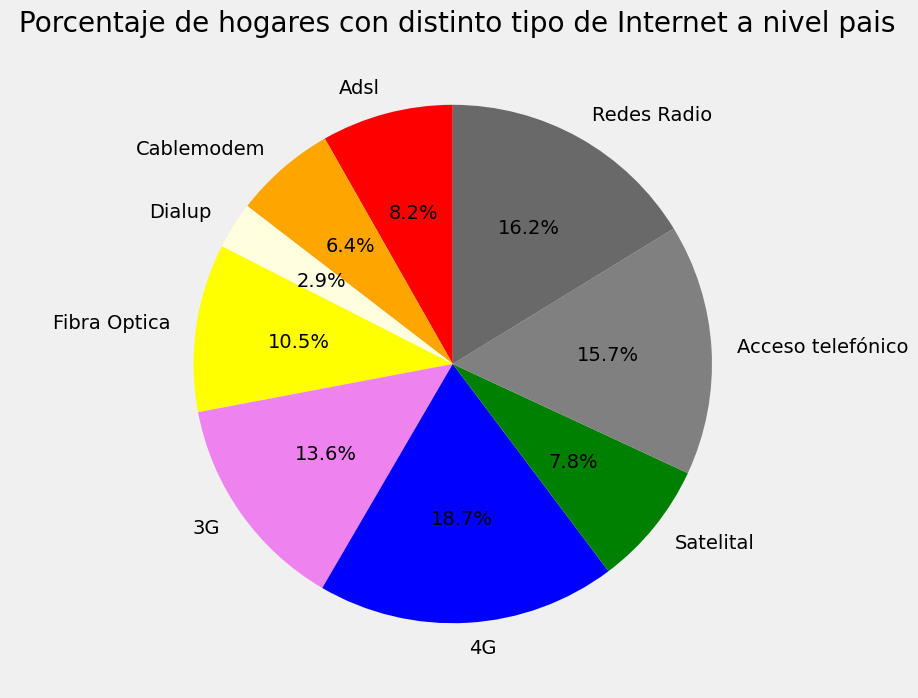

In [412]:

# Count the total "Yes" values in each column
totals = dsCOK[['Adsl', 'Cablemodem', 'Dialup', 'Fibra Optica', '3G', '4G','Satelital','Acceso telefónico', 'Redes Radio' ]].eq('Si').sum()

# Definir lista de colores 
palette1 = sns.color_palette(["red", "orange","lightyellow","yellow", "violet", "blue", "green","grey","#696969" ]) 

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the pie chart
ax.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=90, colors=palette1)

# Add a title
ax.set_title(' Porcentaje de hogares con distinto tipo de Internet a nivel pais')

# Show the plot
plt.show()

En el gráfico circular podemos observar que si bien la banda estrecha todavía está presente en la Argentina, su porcentaje es minoritario con respecto al total que representan otras tecnologías más modernas y de mejor calidad, aunque la tecnología más reciente y veloz, la fibra óptica, representa solo un 10% del total de tecnologías disponibles en el país, lo que demuestra que la Argentina está en un proceso reciente de transición de tecnologías antiguas a tecnologías más modernas.

Profundizamos en los datos comparando el acceso tanto de banda ancha y banda estrecha por provincias de interes, seleccionadas por su nivel de renta y su distribución geográfica en el territorio nacional. Utilizamos un gráfico de barras apiladas para mostrar el porcentaje de tipos de conexión  en  cada provincia que tiene acceso de banda ancha o de banda estrecha, lo que permite un análisis más granular.

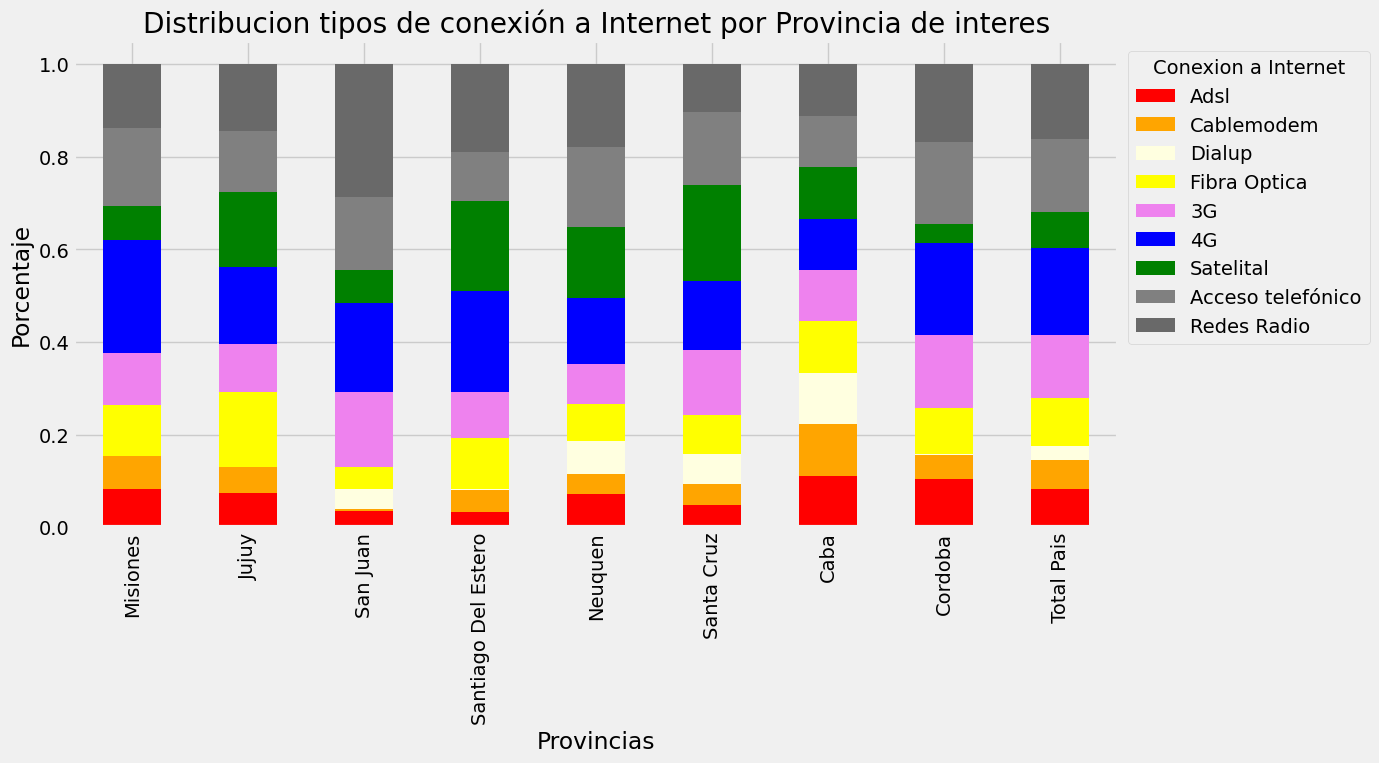

In [413]:


# Count the total "Yes" values in each column
totals = dsCOK[['Adsl', 'Cablemodem', 'Dialup', 'Fibra Optica', '3G', '4G','Satelital','Acceso telefónico', 'Redes Radio' ]].eq('Si').sum()


# Filter the data by specific provinces
provinces = [ 'Misiones','Jujuy', 'San Juan', 'Santiago Del Estero', 'Neuquen',  'Santa Cruz',  'Caba','Cordoba',]
filtered_data = dsCOK[dsCOK['Provincia'].isin(provinces)]

# Create an empty DataFrame to hold the stacked bar chart data
stacked_data = pd.DataFrame(columns=totals.index)

# Iterate over provinces and calculate the stacked bar chart data
for province in provinces:
    # Filter data for the current province
    province_data = filtered_data[filtered_data['Provincia'] == province]
    
    # Count the total households for the province
    total_households = len(province_data)
    
    # Calculate the percentage of "Yes" values in each column for the province
    province_percentages = province_data[['Adsl', 'Cablemodem', 'Dialup', 'Fibra Optica', '3G', '4G','Satelital','Acceso telefónico', 'Redes Radio' ]].eq('Si').mean() * 100
    
    # Normalize the percentages to ensure they add up to 100%
    province_percentages /= province_percentages.sum()
    
    # Append the percentages for the province to the stacked data DataFrame
    stacked_data = stacked_data.append(province_percentages, ignore_index=True)

# Calculate the country total percentages
country_total_percentages = totals / totals.sum() * 100

# Normalize the country total percentages to ensure they add up to 100%
country_total_percentages /= country_total_percentages.sum()

# Append the country total to the stacked data DataFrame
stacked_data = stacked_data.append(country_total_percentages, ignore_index=True)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
stacked_data.plot.bar(stacked=True, ax=ax,color=palette1)

# Add labels and a title
ax.set_xlabel('Provincias')
ax.set_ylabel('Porcentaje')
ax.set_title('Distribucion tipos de conexión a Internet por Provincia de interes')

# Set the x-axis ticks and labels
ax.set_xticks(range(len(provinces)+1))
ax.set_xticklabels(provinces + [' Total Pais'])



# Place the legend outside the plot
ax.legend(title='Conexion a Internet', bbox_to_anchor=(1, 1), loc='upper left')


plt.show()



Esta visualización nos permite observar.que las distintas tecnologías están bien distribuidas en el territorio nacional.y que su adopción no depende, o lo hace mínimamente, del nivel de renta de la provincia o de su ubicación geográfica. La banda estrecha permanece distribuida en prácticamente los mismos niveles por todo el país, mientras que la fibra óptica, la tecnología más novedosa, está recién comenzando a ser adoptada y lo hace en la misma proporción en toda la extensión nacional. 

Decidimos mostrar en usendos mapas de densidad del país, con diferentes colores, el acceso a Internet por banda ancha y banda estrecha superpuestos. Esto nos ofrece  una perspectiva de alto nivel sobre la inclusión digital.

In [461]:


fig = go.Figure(layout={'width': 800, 'height': 1000})
dsCOK['Banda_ancha']=dsCOK[['Adsl', 'Satelital', '3G', '4G', 'Fibra Optica']].eq('Si').sum(axis=1)
dsCOK['Banda_estrecha']=dsCOK[['Acceso telefónico', 'Redes Radio']].eq('Si').sum(axis=1)
dsCSlice=dsCOK[[ 'Latitud',  'Longitud',  'Banda_ancha']]
dsCSliceBE=dsCOK[[ 'Latitud',  'Longitud',  'Banda_estrecha']]

mean_lat = dsCOK['Latitud'].mean()
mean_lon = dsCOK['Longitud'].mean()


fig = px.density_mapbox(dsCSlice, lat = 'Latitud', lon = 'Longitud', z = 'Banda_ancha',
                        radius = 8,
                        center = dict(lat = mean_lat , lon = mean_lon),
                        zoom = 6,
                        mapbox_style = 'open-street-map', color_continuous_scale="hot")
fig.show()


In [462]:
mean_lat = dsCOK['Latitud'].mean()
mean_lon = dsCOK['Longitud'].mean()



fig = px.density_mapbox(dsCSliceBE, lat = 'Latitud', lon = 'Longitud', z = 'Banda_estrecha',
                        radius = 8,
                        center = dict(lat = mean_lat , lon = mean_lon),
                        zoom = 6,
                        mapbox_style = 'open-street-map', color_continuous_scale="blues")
fig.show()

**Capítulo 2: Calidad** - Exploramos las diferencias en el acceso a servicio de calidad.Tener velocidades de bajada altas y consistentes es esencial para buena calidad en servicios digitales ya que influyen en la experiencia del usuario al descargar sitios web, video, música, etc. Por ejemplo, para streaming HD se recomienda mínimo 25 Mbps de bajada. Gaming requiere al menos 15 Mbps.


In [416]:
# Generamos nuevos slices a partir del dataset original.

dbA02=dbA[['0-2 Mbps','Latitud','Longitud']]
dbA25=dbA[['2-5 Mbps','Latitud','Longitud']]
dbA510=dbA[['5-10 Mbps','Latitud','Longitud']]
dbA1020=dbA[['10-20 Mbps','Latitud','Longitud']]
dbA2030=dbA[['20-30 Mbps','Latitud','Longitud']]
dbA3050=dbA[['30-50 Mbps','Latitud','Longitud']]
dbA50100=dbA[['50-100 Mbps','Latitud','Longitud']]

In [445]:
def chart_internet_speeds(speed_band, df, image_file):
    df = df[df[speed_band].notna()]  # Filter out rows where speed_band is NaN

    if not df.empty:
        fig = go.Figure(go.Densitymapbox(
            lon=df.Longitud,
            lat=df.Latitud,
            z=df[speed_band],
            radius=10,
            colorscale='blackbody',
            zmin=0,
            zmax=df[speed_band].max(),
            showscale=True))

        fig.update_layout(
            mapbox_style="carto-positron",
            mapbox_center_lon=df.Longitud.mean(),
            mapbox_center_lat=df.Latitud.mean(),
            mapbox_zoom=4,
            width=800,
            height=1200,
            annotations=[
                dict(
                    x=0.1,
                    y=0.1,
                    xref='paper',
                    yref='paper',
                    text=f"Internet Speed: {speed_band}",
                    showarrow=False,
                    font=dict(
                        size=14,
                        color='black'
                    ),
                    align='right',
                    bordercolor='black',
                    borderwidth=2,
                    borderpad=0,
                    bgcolor='white',
                    opacity=0.8
                )
            ]
        )

        fig.write_image(image_file, format='png', scale=3)  # save the figure as a png image
    else:
        print("No data")



In [446]:
# Generamos las imágenes usando la funcion precedente.

chart_internet_speeds('0-2 Mbps', dbA02, "img_02Mbps.png")
chart_internet_speeds('2-5 Mbps', dbA25, "img_25Mbps.png")
chart_internet_speeds('5-10 Mbps', dbA510, "img_510Mbps.png")
chart_internet_speeds('10-20 Mbps', dbA1020, "img_1020Mbps.png")
chart_internet_speeds('20-30 Mbps', dbA2030, "img_2030Mbps.png")
chart_internet_speeds('30-50 Mbps', dbA3050, "img_3050Mbps.png")
chart_internet_speeds('50-100 Mbps', dbA50100, "img_50100Mbps.png")


Por cuestiones de espacio, no mostramos las imágenes generadas su tamaño original, sino que con esta función armamos una cuadrícula con las imágenes en  menor tamaño pero las originales pueden observarse en la carpeta imágenes de este proyecto.

In [420]:
from PIL import Image

images = [Image.open(x) for x in ["./Images/img_02Mbps.png", "./Images/img_25Mbps.png", "./Images/img_510Mbps.png",
                                  "./Images/img_1020Mbps.png", "./Images/img_2030Mbps.png", "./Images/img_3050Mbps.png",
                                  "./Images/img_50100Mbps.png"]]

widths, heights = zip(*(i.size for i in images))

total_width = max(widths)*3
total_height = max(heights)*3

new_image = Image.new('RGB', (total_width, total_height))

x_offset = 0
y_offset = 0
for idx, img in enumerate(images):
    new_image.paste(img, (x_offset, y_offset))
    if (idx+1) % 3 == 0:  # go to next row after every 3 images
        x_offset = 0
        y_offset += max(heights)
    else:
        x_offset += max(widths)
display(new_image)



En esta serie de gráficos se puede apreciar con claridad que las velocidades de internet más comunes en todo el territorio nacional van desde los 5 a los 30  mbps. con lo que concluimos.que la calidad a la que se accede en Argentina, si bien no es óptima .es suficiente para el usuario medio.También podemos notar que las velocidades más altas correspondientes a fibra óptica están recién comenzando a ser adoptadas y lo hacen siempre.comenzando por los distritos más poblados. La banda estrecha, de cero a dos mbps prácticamente ha desaparecido del territorio nacional permaneciendo, curiosamente, en los centros urbanos más poblados y no en los despoblados y remotos.

Cuando hacemos el mismo análisis en las provincias seleccionadas podemos confirmar lo visto en el gráfico anterior pero se logra evidenciar que en las provincias de mayor renta hay una mayor prevalencia de velocidades altas. Es decir, el nivel socio económico no afecta el acceso a internet de calidad buena pero si facilita el acceso a velocidades mayores.

In [449]:

# Filter by provinces
provinces =  ['Misiones','Jujuy', 'San Juan', 'Santiago Del Estero', 'Neuquen',  
              'Santa Cruz',  'Caba','Cordoba']  # Add more provinces if needed
df_filtered = dbA[dbA['Provincia'].isin(provinces)]

# Create the subplot
fig = make_subplots(rows=4, cols=2, subplot_titles=provinces, vertical_spacing=0.1)

# Define the row and column indices for subplot placement
row_indices = [1, 1, 2, 2, 3, 3, 4, 4]
col_indices = [1, 2, 1, 2, 1, 2, 1, 2]

# Define color for each speed tier
color_dict = {
    '0-2 Mbps': 'grey',
    '2-5 Mbps': 'darkgray',
    '5-10 Mbps': 'lightyellow',
    '10-20 Mbps': 'yellow',
    '20-30 Mbps': 'orange',
    '30-50 Mbps': 'red',
    '50-100 Mbps': 'darkred'}

# Find the global maximum value to use as the y-axis maximum for all subplots
y_max = df_filtered[['0-2 Mbps', '2-5 Mbps', '5-10 Mbps', '10-20 Mbps', 
                     '20-30 Mbps', '30-50 Mbps', '50-100 Mbps']].sum().max()

# Iterate over the provinces and add a histogram for each one
for i, province in enumerate(provinces):
    df_prov = df_filtered[df_filtered['Provincia'] == province]
    show_legend = i == 0  # Show legend only for the first subplot
    for speed in ['0-2 Mbps', '2-5 Mbps', '5-10 Mbps', '10-20 Mbps', 
                  '20-30 Mbps', '30-50 Mbps', '50-100 Mbps']:
        fig.add_trace(go.Bar(
            x=[province],
            y=[df_prov[speed].sum()],
            name=speed,
            marker_color=color_dict[speed],  # Set the bar color by the internet speed
            showlegend=show_legend
        ), row=row_indices[i], col=col_indices[i])

   # Update yaxis properties for the subplot
    fig.update_yaxes(type='log', range=[1, 5], row=row_indices[i], col=col_indices[i])  # Range is in the log scale

    # If the province is 'Caba' or 'Cordoba', update y axis properties for the subplot
    if province in ['Caba', 'Cordoba']:
        fig.update_yaxes(type='log', range=[1, 6], row=row_indices[i], col=col_indices[i])  # Range is in the log scale
        
        
fig.update_layout(
    title="Número de accesos para cada nivel de velocidad de Internet por provincia",
    yaxis_title="Numero de Accesos",
    barmode='group',
    height=800,  # Adjust these values as needed to get square subplots
    width=800
)

fig.show()


Cuando hacemos el mismo análisis en las provincias seleccionadas podemos confirmar lo visto en el gráfico anterior pero se logra evidenciar que en las provincias de mayor renta hay una mayor prevalencia de velocidades altas. Es decir, el nivel socio económico no afecta el acceso a internet de calidad buena pero si facilita el acceso a velocidades mayores.

**Capítulo 3: Impacto** - Unimos las implicaciones del acceso y la calidad e Internet con el número y cobertura de los Operadores de Telecomunicaciones.




In [437]:
dfBC = pd.merge(dfB, dsC[["Localidad",'Poblacion', 'Provincia']], on='Localidad', how='outer')


In [452]:

# Filter by provinces
provinces = ['Misiones','Jujuy', 'San Juan', 'Santiago Del Estero', 'Neuquen', 'Santa Cruz',  'Caba','Cordoba']
df_filtered = dfBC[dfBC['Provincia'].isin(provinces)]


# Create dataframe grouping by provinces and operators, getting the distinct count of locations and sum of population
df_grouped = df_filtered.groupby(['Provincia', 'Operador']).agg({'Localidad':'nunique', 'Poblacion':'sum'}).reset_index()

# Sort the dataframe and keep only top 10 operators for each province by number of locations
df_sorted = df_grouped.sort_values(['Provincia', 'Localidad'], ascending=[True, False])
df_sorted = df_sorted.groupby('Provincia').head(10)

# Create the subplot
fig = make_subplots(rows=4, cols=2, subplot_titles=provinces)

# Define the row and column indices for subplot placement
row_indices = [1, 1, 2, 2, 3, 3, 4, 4]
col_indices = [1, 2, 1, 2, 1, 2, 1, 2]

# Generate a color sequence for operators
operators = df_sorted['Operador'].unique()
colors = px.colors.qualitative.Plotly * (len(operators) // 10 + 1)  # This will repeat colors if there are more than 10 unique operators
color_dict = {operator: colors[i] for i, operator in enumerate(operators)}

# Iterate over the provinces and add a box plot for each one
for i, province in enumerate(provinces):
    df_prov = df_sorted[df_sorted['Provincia'] == province]
    for operator in df_prov['Operador'].unique():
        df_op = df_prov[df_prov['Operador'] == operator]
        fig.add_trace(go.Box(
            y=df_op['Poblacion'],
            name="",
            text=[operator] * len(df_op),
            hoveron='boxes',# Use operator names as custom text
            hovertemplate='Operator: %{text}<br>Population: %{y}',  # Customize hover template
            marker_color=color_dict[operator],  # Use color-coded operator
            showlegend=False
        ), row=row_indices[i], col=col_indices[i])
 


fig.update_layout(
    xaxis_title="Operador",
    yaxis_title="Poblacion",
    title="Marketshare por Operador en cada Provincia",
    height=2250,  # Adjust these values as needed
    width=750
)

fig.show()




En esta serie de gráficos podemos ver que la oferta de operadores en el país es bastante variada solo en las provincias.con mayor renta y mayor población parece haber mayor competencia y el marketshare es compartido por menos operadores. En cambio, en las provincias más despobladas y con menor renta existen múltiples operadores de menor tamaño pero que ofrecen buen servicio de internet.



In [451]:

# Filter by provinces
provinces = ['Misiones','Jujuy', 'San Juan', 'Santiago Del Estero', 'Neuquen', 'Santa Cruz',  'Caba','Cordoba']
df_filtered = dfBC[dfBC['Provincia'].isin(provinces)]


# First, drop duplicate rows based on 'Provincia' and 'Localidad', to ensure we only count the population of each location once
df_unique_locations = df_filtered.drop_duplicates(subset=['Provincia', 'Localidad'])

# Now, group by 'Provincia' to get the total population and count unique operators
df_grouped = df_unique_locations.groupby('Provincia').agg({'Poblacion':'sum', 'Operador':'nunique'}).reset_index()

# Create a scatter plot
fig = go.Figure(
    data=go.Scatter(
        y=df_grouped['Poblacion'],
        x=df_grouped['Operador'],
        mode='markers',
        text=df_grouped['Provincia'],  # This will add province names as hover text
        marker=dict(size=10, color='red')
    )
)

fig.update_layout(
    title="Numero de Operadores vs. Poblacion por Provincia",
    xaxis_title="Numero de Operadores",
    yaxis_title="Provincia",
    hovermode='closest'  # The tooltip will show info of the closest point
)

fig.show()

Aquí podemos evidenciar una clara tendencia lineal que relaciona  la cantidad de operadores con la población de una provincia. Salvo por Caba, un claro outlier, a mayor población, existe mayor cantidad de Operadores para satisfacer las necesidades de dicha población.